In [1]:
import pandas as pd

In [2]:
# df = pd.read_csv('data/EPL/2009_2010/stage-team-stats-summary.csv')
df = pd.read_csv('data/LaLiga/2009_2010/stage-team-stats-summary.csv')

In [3]:
df.head()

,Team,Goals,Shots pg,Discipline,Possession%,Pass%,AerialsWon,Rating
0,1. Barcelona,98,15.6,745,63.7,87.0,8.3,7.30
1,2. Real Madrid,102,21.5,875,57.0,83.3,9.9,7.27
2,3. Valencia,59,14.3,1078,54.4,78.3,9.2,6.96
3,4. Mallorca,59,12.8,954,46.5,71.5,12.7,6.95
4,5. Sevilla,66,13.2,9910,52.1,75.0,12.3,6.91


In [4]:
def get_team_name(name):
    name = name.split('.')[1].strip()
    return name    

In [5]:
df['Team'] = df['Team'].apply(get_team_name)

In [6]:
df.head()

,Team,Goals,Shots pg,Discipline,Possession%,Pass%,AerialsWon,Rating
0,Barcelona,98,15.6,745,63.7,87.0,8.3,7.30
1,Real Madrid,102,21.5,875,57.0,83.3,9.9,7.27
2,Valencia,59,14.3,1078,54.4,78.3,9.2,6.96
3,Mallorca,59,12.8,954,46.5,71.5,12.7,6.95
4,Sevilla,66,13.2,9910,52.1,75.0,12.3,6.91


In [7]:
temp = df.sort_values("Goals", ascending=False, ignore_index=True)

In [8]:
temp.loc[0:4]["Goals"].sum()

384

In [9]:
df['Goals'].sum()

1033

In [10]:
df["Shots pg"].mean()

13.039999999999997

In [11]:
from jupyter_dash import JupyterDash
from dash import dcc
from dash import html
import plotly.express as px

In [12]:
app = JupyterDash(__name__)

possession_df = df.sort_values("Possession%")
fig = px.bar(possession_df, x="Team", y="Possession%")

app.layout = html.Div(children=[
    html.H1(children='Possesion by Teams'),

    html.Div(children='''
        Dash: A web application framework for your data.
    '''),

    dcc.Graph(
        id='possession-graph',
        figure=fig
    )
])

In [13]:
app.run_server(mode="inline", port=8060)

# Goals

## La Liga

In [14]:
import os

In [15]:
all_team_stats = {
    "Season": [],
    "Total Goals": [],
    "Avg Shots Pg": [],
    "Avg Possession%": [],
    "Avg Successful Pass%": [],
    "Avg Aerials Won": []
}

for dir in os.listdir('data\\LaLiga'):
    all_team_stats["Season"].append(dir)
    path = os.path.join('data\\LaLiga', dir, 'stage-team-stats-summary.csv')
    df = pd.read_csv(path)
    all_team_stats["Total Goals"].append(df["Goals"].sum())
    all_team_stats["Avg Shots Pg"].append(df["Shots pg"].mean())
    all_team_stats["Avg Possession%"].append(df["Possession%"].mean())
    all_team_stats["Avg Successful Pass%"].append(df["Pass%"].mean())
    all_team_stats["Avg Aerials Won"].append(df["AerialsWon"].mean())   

all_team_stats_df = pd.DataFrame.from_dict(all_team_stats)

In [48]:
top5_team_stats = {
    "Season": [],
    "Total Goals": [],
    "Avg Shots Pg": [],
    "Avg Possession%": [],
    "Avg Successful Pass%": [],
    "Avg Aerials Won": []
}

for dir in os.listdir('data\\LaLiga'):
    top5_team_stats["Season"].append(dir)
    path = os.path.join('data\\LaLiga', dir, 'stage-team-stats-summary.csv')
    df = pd.read_csv(path)
    temp = df.sort_values("Goals", ascending=False, ignore_index=True)
    top5_team_stats["Total Goals"].append(temp.loc[0:4]["Goals"].sum())
    
    temp = df.sort_values("Shots pg", ascending=False, ignore_index=True)
    top5_team_stats["Avg Shots Pg"].append(temp.loc[0:4]["Shots pg"].mean())
    
    temp = df.sort_values("Possession%", ascending=False, ignore_index=True)
    top5_team_stats["Avg Possession%"].append(temp.loc[0:4]["Possession%"].mean())
    
    temp = df.sort_values("Pass%", ascending=False, ignore_index=True)
    top5_team_stats["Avg Successful Pass%"].append(temp.loc[0:4]["Pass%"].mean())
    
    temp = df.sort_values("AerialsWon", ascending=False, ignore_index=True)
    top5_team_stats["Avg Aerials Won"].append(temp.loc[0:4]["AerialsWon"].mean())   

top5_team_stats_df = pd.DataFrame.from_dict(top5_team_stats)

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
sns.set(rc={'figure.figsize':(16,10)})

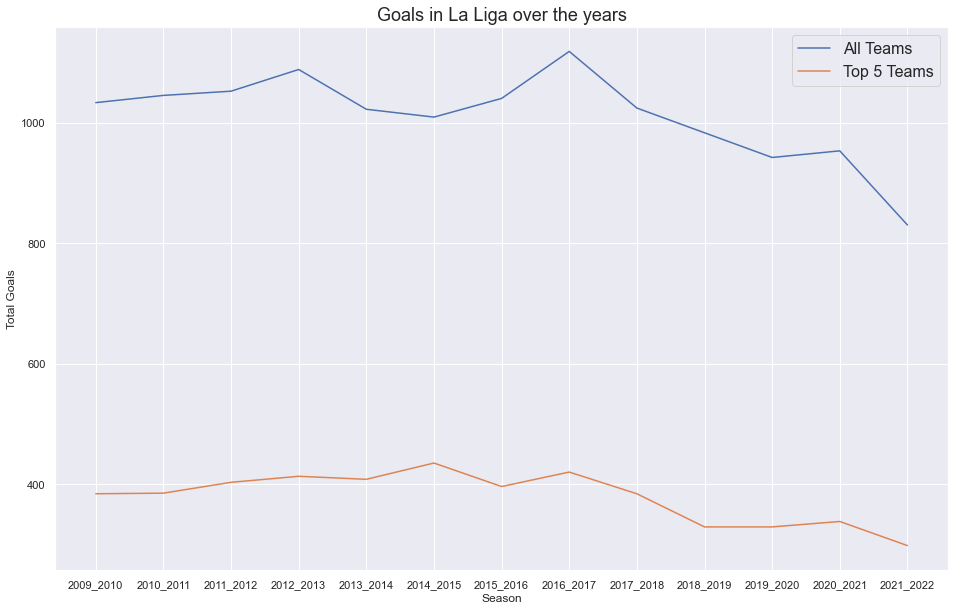

In [51]:
fig, ax = plt.subplots()
sns.lineplot(data=all_team_stats_df, x="Season", y="Total Goals", ax=ax, label="All Teams")
sns.lineplot(data=top5_team_stats_df, x="Season", y="Total Goals", ax=ax, label="Top 5 Teams")
ax.set_title("Goals in La Liga over the years", {'fontsize': 18})
plt.legend(fontsize=16)

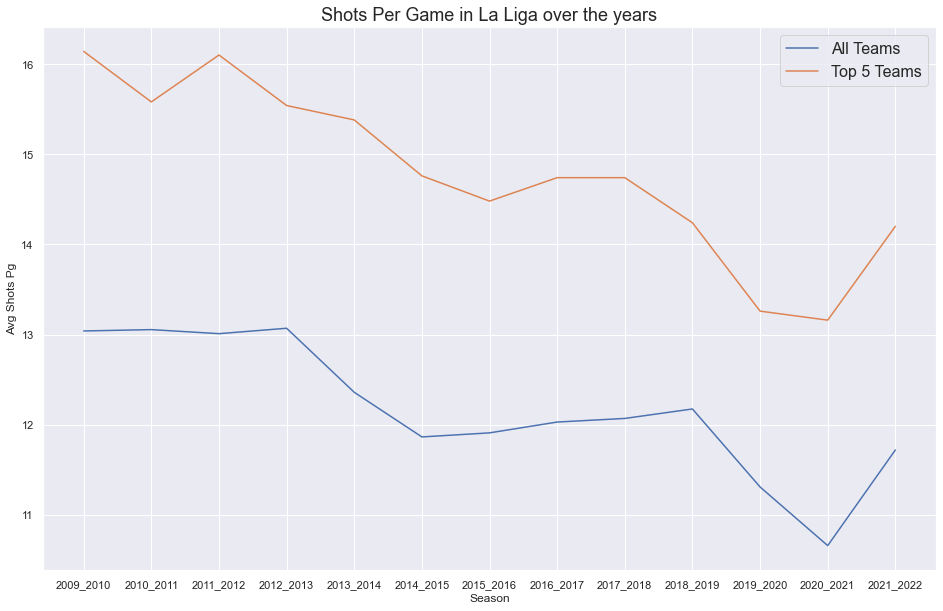

In [56]:
fig, ax = plt.subplots()
sns.lineplot(data=all_team_stats_df, x="Season", y="Avg Shots Pg", ax=ax, label="All Teams")
sns.lineplot(data=top5_team_stats_df, x="Season", y="Avg Shots Pg", ax=ax, label="Top 5 Teams")
ax.set_title("Shots Per Game in La Liga over the years", {'fontsize': 18})
ax.legend(fontsize=16)

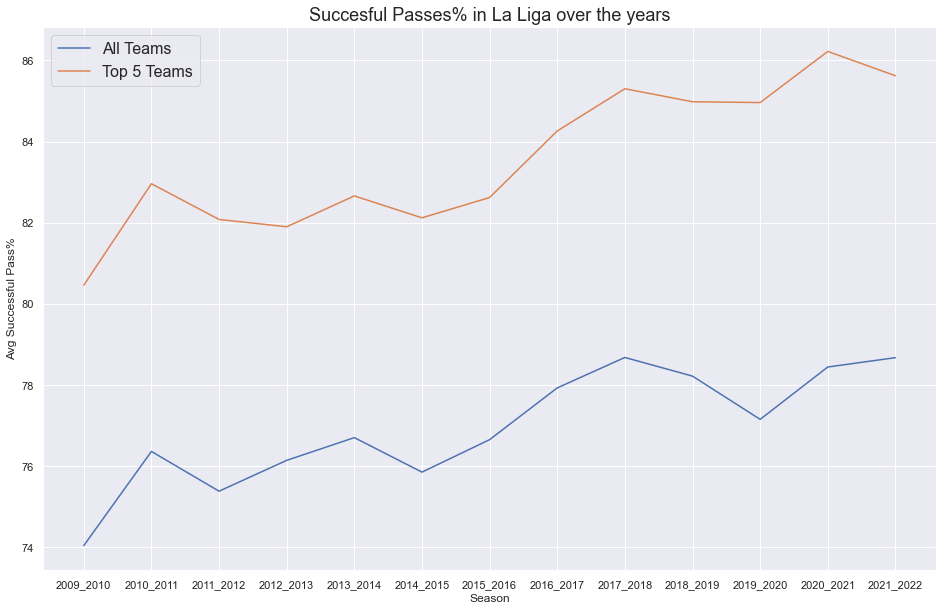

In [57]:
fig, ax = plt.subplots()
sns.lineplot(data=all_team_stats_df, x="Season", y="Avg Successful Pass%", ax=ax, label="All Teams")
sns.lineplot(data=top5_team_stats_df, x="Season", y="Avg Successful Pass%", ax=ax, label="Top 5 Teams")
ax.set_title("Succesful Passes% in La Liga over the years", {'fontsize': 18})
ax.legend(fontsize=16)

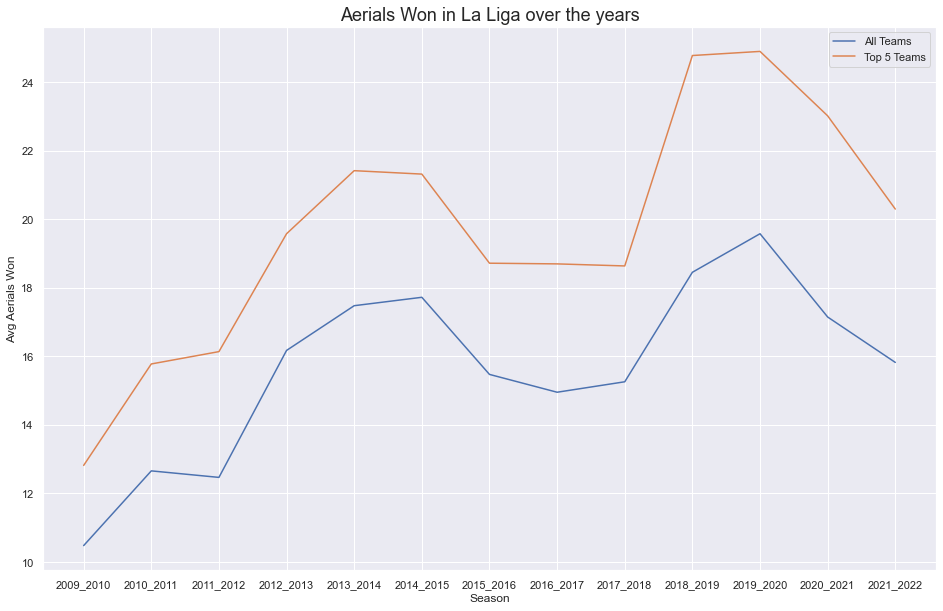

In [58]:
fig, ax = plt.subplots()
sns.lineplot(data=all_team_stats_df, x="Season", y="Avg Aerials Won", ax=ax,label="All Teams")
sns.lineplot(data=top5_team_stats_df, x="Season", y="Avg Aerials Won", ax=ax,label="Top 5 Teams")
ax.set_title("Aerials Won in La Liga over the years", {'fontsize': 18})
ax.legend()

## Premier League

In [59]:
all_team_stats = {
    "Season": [],
    "Total Goals": [],
    "Avg Shots Pg": [],
    "Avg Possession%": [],
    "Avg Successful Pass%": [],
    "Avg Aerials Won": []
}

for dir in os.listdir('data\\EPL'):
    all_team_stats["Season"].append(dir)
    path = os.path.join('data\\EPL', dir, 'stage-team-stats-summary.csv')
    df = pd.read_csv(path)
    all_team_stats["Total Goals"].append(df["Goals"].sum())
    all_team_stats["Avg Shots Pg"].append(df["Shots pg"].mean())
    all_team_stats["Avg Possession%"].append(df["Possession%"].mean())
    all_team_stats["Avg Successful Pass%"].append(df["Pass%"].mean())
    all_team_stats["Avg Aerials Won"].append(df["AerialsWon"].mean())   

all_team_stats_df = pd.DataFrame.from_dict(all_team_stats)

In [60]:
top5_team_stats = {
    "Season": [],
    "Total Goals": [],
    "Avg Shots Pg": [],
    "Avg Possession%": [],
    "Avg Successful Pass%": [],
    "Avg Aerials Won": []
}

for dir in os.listdir('data\\EPL'):
    top5_team_stats["Season"].append(dir)
    path = os.path.join('data\\EPL', dir, 'stage-team-stats-summary.csv')
    df = pd.read_csv(path)
    temp = df.sort_values("Goals", ascending=False, ignore_index=True)
    top5_team_stats["Total Goals"].append(temp.loc[0:4]["Goals"].sum())
    
    temp = df.sort_values("Shots pg", ascending=False, ignore_index=True)
    top5_team_stats["Avg Shots Pg"].append(temp.loc[0:4]["Shots pg"].mean())
    
    temp = df.sort_values("Possession%", ascending=False, ignore_index=True)
    top5_team_stats["Avg Possession%"].append(temp.loc[0:4]["Possession%"].mean())
    
    temp = df.sort_values("Pass%", ascending=False, ignore_index=True)
    top5_team_stats["Avg Successful Pass%"].append(temp.loc[0:4]["Pass%"].mean())
    
    temp = df.sort_values("AerialsWon", ascending=False, ignore_index=True)
    top5_team_stats["Avg Aerials Won"].append(temp.loc[0:4]["AerialsWon"].mean())   

top5_team_stats_df = pd.DataFrame.from_dict(top5_team_stats)

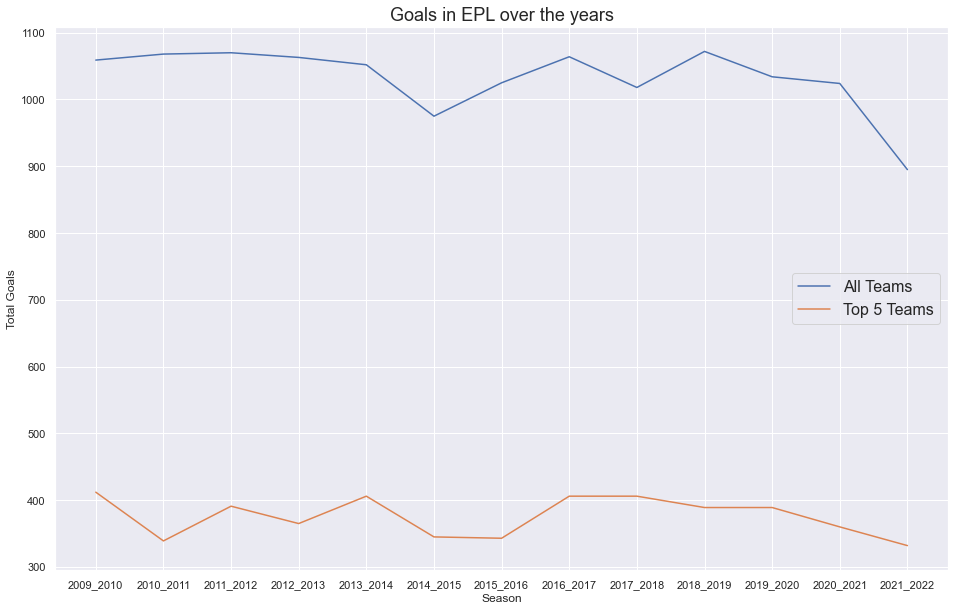

In [62]:
fig, ax = plt.subplots()
sns.lineplot(data=all_team_stats_df, x="Season", y="Total Goals", ax=ax, label="All Teams")
sns.lineplot(data=top5_team_stats_df, x="Season", y="Total Goals", ax=ax, label="Top 5 Teams")
ax.set_title("Goals in EPL over the years", {'fontsize': 18})
plt.legend(fontsize=16)

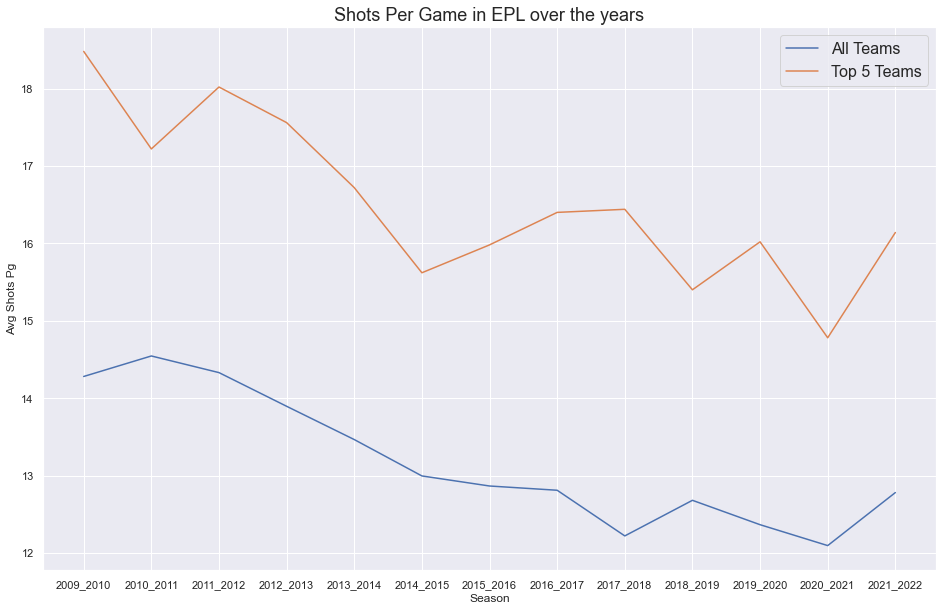

In [63]:
fig, ax = plt.subplots()
sns.lineplot(data=all_team_stats_df, x="Season", y="Avg Shots Pg", ax=ax, label="All Teams")
sns.lineplot(data=top5_team_stats_df, x="Season", y="Avg Shots Pg", ax=ax, label="Top 5 Teams")
ax.set_title("Shots Per Game in EPL over the years", {'fontsize': 18})
ax.legend(fontsize=16)

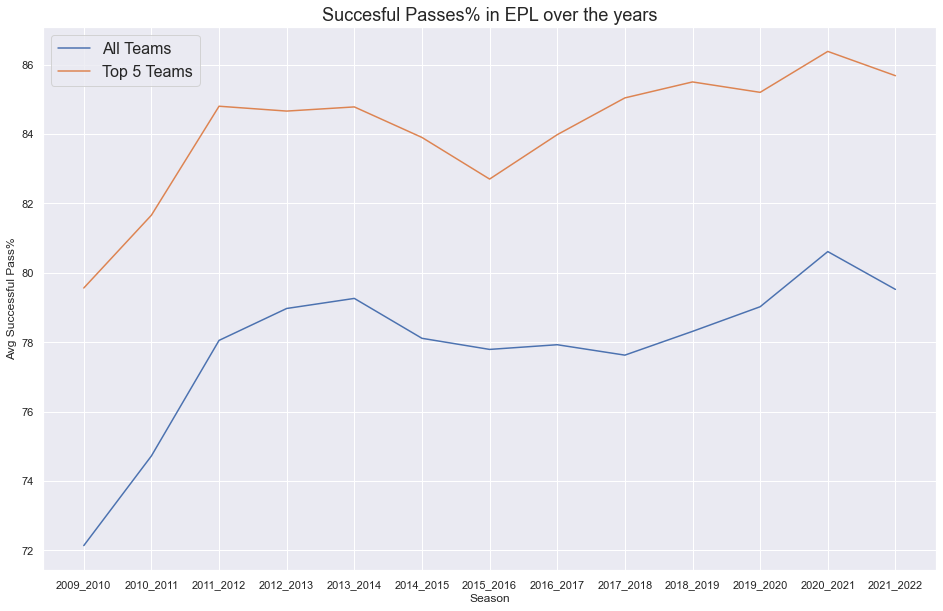

In [64]:
fig, ax = plt.subplots()
sns.lineplot(data=all_team_stats_df, x="Season", y="Avg Successful Pass%", ax=ax, label="All Teams")
sns.lineplot(data=top5_team_stats_df, x="Season", y="Avg Successful Pass%", ax=ax, label="Top 5 Teams")
ax.set_title("Succesful Passes% in EPL over the years", {'fontsize': 18})
ax.legend(fontsize=16)

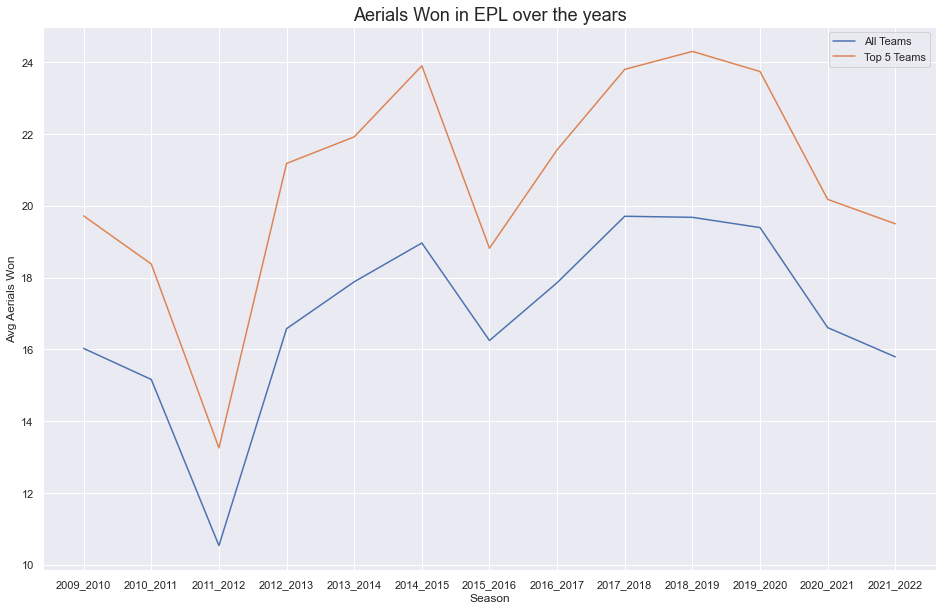

In [65]:
fig, ax = plt.subplots()
sns.lineplot(data=all_team_stats_df, x="Season", y="Avg Aerials Won", ax=ax,label="All Teams")
sns.lineplot(data=top5_team_stats_df, x="Season", y="Avg Aerials Won", ax=ax,label="Top 5 Teams")
ax.set_title("Aerials Won in EPL over the years", {'fontsize': 18})
ax.legend()